<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_5_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 5**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: PROGRAMACIÓN CON PYTHON
*   CARRERA: DATA SCIENCE

**Ejercicio: Policías, Sospechosos e Incidentes.**

---
Para desarrollar este desafío necesitarás los siguientes archivos:
- incidents.pkl
- officers.pkl
- subjects.pkl

1. Carga los datos y crea un DataFrame con cada uno de ellos.
2. Genera una tabla que contenga la unión de las 3 tablas. **hint: utiliza sufijos para para las columnas que se llaman igual usando el parámetro suffixes de pd.merge()**.
3. Verifica si hay filas duplicadas; si es así, elimínalas.
4. ¿Cuántos sujetos de género F hay en el DataFrame resultante? **hint: usa el método .value_counts() sobre la columna.**
5. ¿En cuántos números de caso hay por lo menos una sospechosa que sea mujer? **hint: utiliza el método unique() para obtener los valores únicos de una columna específica de un DataFrame luego de filtrar.**
6. Genera una tabla pivote que muestre el número de casos por mes en la fila y por año en las columnas. hint: genere columnas de tipo fecha con pd.to_datetime(). ¿Se ve alguna relación entre mes del año y cantidad de casos?
7. Genera una tabla pivote que muestre en las filas el género del oficial y en las columnas el género del subject. ¿Cómo interpretas los valores que muestra esta vista?

In [4]:
# Carga los datos y crea un DataFrame con cada uno de ellos.

import pandas as pd

df_incidents = pd.read_pickle("incidents.pkl")
df_officers = pd.read_pickle("officers.pkl")
df_subjects = pd.read_pickle("subjects.pkl")

In [5]:
# Genera una tabla que contenga la unión de las 3 tablas.

df_merged = pd.merge(df_incidents, df_officers, on='case_number', suffixes=('_incidents', '_officers'))
df_merged = pd.merge(df_merged, df_subjects, on='case_number', suffixes=('_officers', '_subjects'))
df_merged.head()

,case_number,date,location,subject_statuses,subject_weapon,subjects,subject_count,officers,officer_count,grand_jury_disposition,...,race_officers,gender_officers,last_name_officers,first_name_officers,full_name_officers,race_subjects,gender_subjects,last_name_subjects,first_name_subjects,full_name_subjects
0,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,...,L,M,Patino,Michael,"Patino, Michael",L,M,Curry,James,"Curry, James"
1,44523A,2013-02-23,3000 Chihuahua Street,Injured,Handgun,"Curry, James L/M",1,"Patino, Michael L/M; Fillingim, Brian W/M",2,No Bill,...,W,M,Fillingim,Brian,"Fillingim, Brian",L,M,Curry,James,"Curry, James"
2,121982X,2010-05-03,1300 N. Munger Boulevard,Injured,Handgun,"Chavez, Gabriel L/M",1,"Padilla, Gilbert L/M",1,No Bill,...,L,M,Padilla,Gilbert,"Padilla, Gilbert",L,M,Chavez,Gabriel,"Chavez, Gabriel"
3,605484T,2007-08-12,200 S. Stemmons Freeway,Other,Shotgun,"Salinas, Nick L/M",1,"Poston, Jerry W/M",1,See Summary,...,W,M,Poston,Jerry,"Poston, Jerry",L,M,Salinas,Nick,"Salinas, Nick"
4,384832T,2007-05-26,7900 S. Loop 12,Shoot and Miss,Unarmed,"Smith, James B/M; Dews, Antonio B/M; Spearman,...",3,"Mondy, Michael B/M",1,None,...,B,M,Mondy,Michael,"Mondy, Michael",B,M,Smith,James,"Smith, James"


In [6]:
# Verifica si hay filas duplicadas; si es así, elimínalas.

df_duplicados = df_merged.value_counts([df_merged.duplicated()])
print("No existen registros duplicados en el dataset.")

No existen registros duplicados en el dataset.


In [7]:
# ¿Cuántos sujetos de género F hay en el DataFrame resultante?

total_mujeres = df_merged['gender_officers'].value_counts().loc['F']
print(f"El dataframe resultante tiene {total_mujeres} mujeres.")

El dataframe resultante tiene 20 mujeres.


In [8]:
# ¿En cuántos números de caso hay por lo menos una sospechosa que sea mujer?

num_casos_mujer = len(df_merged[df_merged['gender_subjects'] == 'F']['case_number'].unique())
print(f"Hay {num_casos_mujer} casos en los que al menos uno de los sospechosos es mujer.")

Hay 7 casos en los que al menos uno de los sospechosos es mujer.


In [9]:
# Genera una tabla pivote que muestre el número de casos por mes en la fila y por año en las columnas.

df_merged['date'] = pd.to_datetime(df_merged['date'])
df_pivot = df_merged.pivot_table(index=df_merged['date'].dt.month,
                                 columns=df_merged['date'].dt.year,
                                 aggfunc='size', fill_value=0)
print("Tabla pivote de casos por mes y año:")
print(df_pivot)

Tabla pivote de casos por mes y año:
date  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
date                                                                           
1        2     2     0     1     1     1     2     0     0     0     7     4   
2        0     1     1     7     1     0     0     3     0     7     7     3   
3        1     8     1     1     5     8     3     7     2     6     3     0   
4        1     4     0     2     0     1     0     1     0     0     3     4   
5        1     1     2     2     9     5     4     1     1     9     1     1   
6        8     1     0     0     3     3     0     2     2     2     3     6   
7        4     2     0     0     1     4     0     0     1     2     2     2   
8        2     0     1     0     3     4     0     0     0     3     0     7   
9        0     1     0     3     2     2     4     0     0     0     5     1   
10       7     1     0     0     0     0     3     1     1     2     4     2   
11 

In [10]:
# Genera una tabla pivote que muestre en las filas el género del oficial y en las columnas el género del subject. ¿Cómo interpretas los valores que muestra esta vista?

df_pivot_gender = pd.pivot_table(df_merged, values='case_number', index='gender_officers', columns='gender_subjects', aggfunc='count', fill_value=0)
print("Tabla pivote de género del oficial vs. género del sospechoso:")
print(df_pivot_gender)

print("CONCLUSIÓN: La participación de las mujeres es minoritaria tanto en la calidad de sospechosos donde representan menos del 5% como de oficiales en donde su representación apenas supera el 5%.")

Tabla pivote de género del oficial vs. género del sospechoso:
gender_subjects  F    M
gender_officers        
F                2   18
M                7  350
CONCLUSIÓN: La participación de las mujeres es minoritaria tanto en la calidad de sospechosos donde representan menos del 5% como de oficiales en donde su representación apenas supera el 5%.


**Ejercicio: Cleaned Jobs.**

---
Para continuar con el desarrollo de este desafío, necesitarás el archivos
**Cleaned_DS_Jobs.csv**

1. Carga los datos y crea un DataFrame con ellos.
2. Utiliza la siguiente lista de valores que serán considerados como nulos:
["na", "NA", -1, "0", "-1", "null", "n/a", "N/A", "NULL"]
(**hint: utiliza el método replace para reemplazar los valores indicados por np.nan**)
3. Elimina todas las filas con datos faltantes. (**hint: utiliza el método .dropna()**)
4. A partir de la columna “Salary Estimate”, genera dos columnas: Salario Estimado Mínimo y Máximo. (**hint: Utiliza el método apply sobre la columna.**)
5. Realiza la recodificación de la columna Size con los valores de la siguiente tabla: (**hint: utilice reemplazo con diccionario usando el método replace sobre la columna.**)
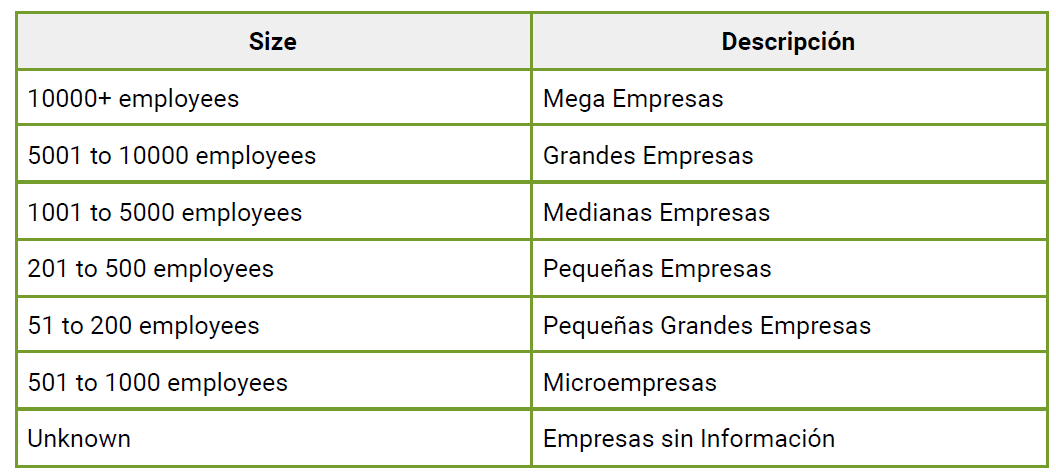
6. Finalmente, genera una tabla pivote que muestre la media del salario estimado mínimo y la media del salario estimado máximo por tamaño de empresa. (**hint: utiliza pd.pivot_table para generar la vista adecuada con las columnas generadas.**)

In [56]:
# Carga los datos y crea un DataFrame con ellos.

import numpy as np

df_jobs = pd.read_csv("Cleaned_DS_Jobs.csv")
df_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52,0,0,1,0,0,0,1,data scientist,na
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39,1,1,0,0,1,0,0,data scientist,na
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20,1,1,0,0,1,0,0,data scientist,na
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22,1,1,0,0,0,0,0,data scientist,na


In [57]:
# Utiliza la siguiente lista de valores que serán considerados como nulos: ["na", "NA", -1, "0", "-1", "null", "n/a", "N/A", "NULL"]

nulos = ["na", "NA", -1, "0", "-1", "null", "n/a", "N/A", "NULL"]

for i in nulos:
  df_jobs.replace(i,np.nan, inplace=True)

df_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,27.0,0,0,0,0,1,0,0,data scientist,senior
1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,52.0,0,0,1,0,0,0,1,data scientist,NaN
2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,39.0,1,1,0,0,1,0,0,data scientist,NaN
3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,20.0,1,1,0,0,1,0,0,data scientist,NaN
4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,22.0,1,1,0,0,0,0,0,data scientist,NaN


In [58]:
# Se verifica la cantidad de registros original del dataframe.

df_jobs.shape

(660, 27)

In [59]:
# Se identifica la cantidad de registros nulos en cada columna del dataframe.

df_jobs.isna().sum()

Job Title              0
Salary Estimate        0
Job Description        0
Rating                 0
Company Name           0
Location               0
Headquarters          31
Size                  27
Type of ownership     27
Industry              71
Sector                71
Revenue               27
min_salary             0
max_salary             0
avg_salary             0
job_state              0
same_state             0
company_age          118
python                 0
excel                  0
hadoop                 0
spark                  0
aws                    0
tableau                0
big_data               0
job_simp              68
seniority            567
dtype: int64

In [60]:
# Elimina todas las filas con datos faltantes y se verifica la cantidad de registros que permanecieron.

df_jobs.dropna(inplace=True)
df_jobs.shape

(80, 27)

In [61]:
# A partir de la columna “Salary Estimate”, genera dos columnas: Salario Estimado Mínimo y Máximo.

df_jobs[['Salario Estimado Mínimo', 'Salario Estimado Máximo']] = df_jobs.apply(lambda x: pd.Series({'Salario Estimado Mínimo': int(x['Salary Estimate'].split('-')[0]),
                                                                                                'Salario Estimado Máximo': int(x['Salary Estimate'].split('-')[1])}),
                                                                                                axis=1)

df_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority,Salario Estimado Mínimo,Salario Estimado Máximo
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,0,0,0,1,0,0,data scientist,senior,137,171
32,Senior Research Statistician- Data Scientist,75-131,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",1001 to 5000 employees,Company - Private,Insurance Carriers,...,0,0,0,0,0,0,data scientist,senior,75,131
38,Senior Analyst/Data Scientist,75-131,At Edmunds were driven to make car buying easi...,3.4,Edmunds.com,"Santa Monica, CA","Santa Monica, CA",501 to 1000 employees,Company - Private,Internet,...,1,0,0,1,1,0,data scientist,senior,75,131
45,Senior Data Scientist,75-131,Klaviyo is looking for Senior Data Scientists ...,4.8,Klaviyo,"Boston, MA","Boston, MA",201 to 500 employees,Company - Private,Computer Hardware & Software,...,0,0,0,0,0,0,data scientist,senior,75,131
54,Senior Data Scientist,75-131,Benson Hill empowers innovators to develop mor...,3.5,Benson Hill,"Saint Louis, MO","Saint Louis, MO",201 to 500 employees,Company - Private,Biotech & Pharmaceuticals,...,1,0,0,0,0,1,data scientist,senior,75,131


In [62]:
# Realiza la recodificación de la columna Size con los valores de la tabla del enunciado.

dict_size = {
    '1 to 50 employees': 'Mini Empresas',
    '51 to 200 employees': 'Pequeñas Grandes Empresas',
    '201 to 500 employees': 'Pequeñas Empresas',
    '501 to 1000 employees': 'Microempresas',
    '1001 to 5000 employees': 'Medianas Empresas',
    '5001 to 10000 employees': 'Grandes Empresas',
    '10000+ employees': 'Mega Empresas',
    'Unknown': 'Empresas sin Información'
}

df_jobs['Size'] = df_jobs['Size'].replace(dict_size)

df_jobs.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,...,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority,Salario Estimado Mínimo,Salario Estimado Máximo
0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",Medianas Empresas,Nonprofit Organization,Insurance Carriers,...,0,0,0,1,0,0,data scientist,senior,137,171
32,Senior Research Statistician- Data Scientist,75-131,Acuity is seeking a Senior Research Statistici...,4.8,Acuity Insurance,"Sheboygan, WI","Sheboygan, WI",Medianas Empresas,Company - Private,Insurance Carriers,...,0,0,0,0,0,0,data scientist,senior,75,131
38,Senior Analyst/Data Scientist,75-131,At Edmunds were driven to make car buying easi...,3.4,Edmunds.com,"Santa Monica, CA","Santa Monica, CA",Microempresas,Company - Private,Internet,...,1,0,0,1,1,0,data scientist,senior,75,131
45,Senior Data Scientist,75-131,Klaviyo is looking for Senior Data Scientists ...,4.8,Klaviyo,"Boston, MA","Boston, MA",Pequeñas Empresas,Company - Private,Computer Hardware & Software,...,0,0,0,0,0,0,data scientist,senior,75,131
54,Senior Data Scientist,75-131,Benson Hill empowers innovators to develop mor...,3.5,Benson Hill,"Saint Louis, MO","Saint Louis, MO",Pequeñas Empresas,Company - Private,Biotech & Pharmaceuticals,...,1,0,0,0,0,1,data scientist,senior,75,131


In [65]:
# Genera una tabla pivote que muestre la media del salario estimado mínimo y la media del salario estimado máximo por tamaño de empresa.

df_jobs_pivot = df_jobs.pivot_table(values=['Salario Estimado Mínimo', 'Salario Estimado Máximo'],
                                    index='Size',
                                    aggfunc=lambda x: round(x.mean(), 2),
                                    margins=True,
                                    margins_name='Total')

print(df_jobs_pivot)

                           Salario Estimado Máximo  Salario Estimado Mínimo
Size                                                                       
Empresas sin Información                    110.50                    73.00
Grandes Empresas                            138.88                    92.12
Medianas Empresas                           137.46                    93.92
Mega Empresas                               151.11                    97.89
Microempresas                               146.24                   100.18
Pequeñas Empresas                           141.14                    93.57
Pequeñas Grandes Empresas                   137.67                   100.67
Total                                       141.14                    95.51
